 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_return_path = Path("./Resources/whale_returns.csv")
whale_return_df = pd.read_csv(whale_return_path, index_col = "Date",  infer_datetime_format=True, parse_dates=True)
whale_return_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_return_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_return_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_return_path = Path("./Resources/algo_returns.csv")
algo_return_df = pd.read_csv(algo_return_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_return_df.sort_index(inplace=True)
algo_return_df.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [7]:
# Count nulls
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_return_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close']= sp500_df['Close'].str.replace("$", "", regex=True).astype("float")


In [12]:
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
# Calculate Daily # Calculate Daily Returns
sp500_daily_return = sp500_df.pct_change()
sp500_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp500_daily_return.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_return = sp500_daily_return.rename(columns={'Close':'sp500 Return'})
sp500_daily_return.head()

,sp500 Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_1 = whale_return_df
df_2 = algo_return_df
df_3 = sp500_daily_return
joined_return_list = [df_1, df_2, df_3]

In [17]:
joined_return = pd.concat(joined_return_list,axis="columns", join="inner")

In [18]:
joined_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Return'}, xlabel='Date'>

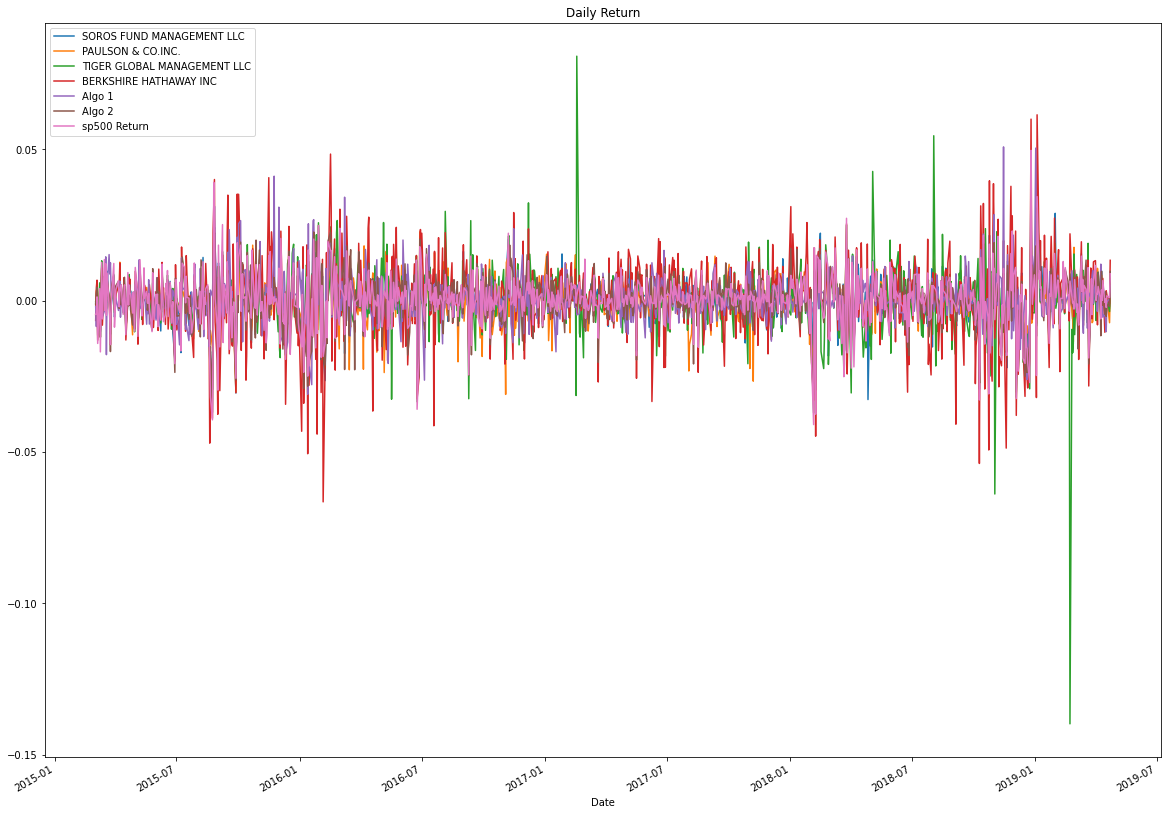

In [19]:
# Plot daily returns of all portfolios
joined_return.plot(figsize=(20,15), title="Daily Return")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

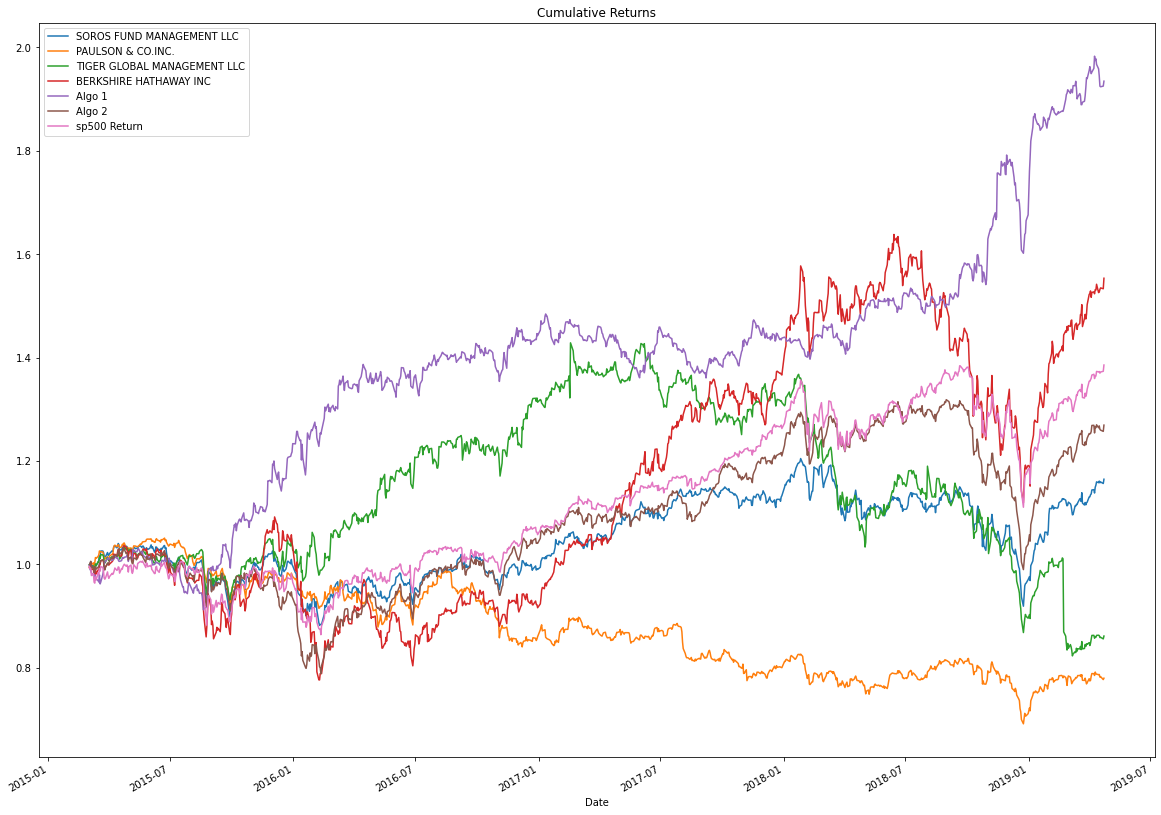

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_return).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,15), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

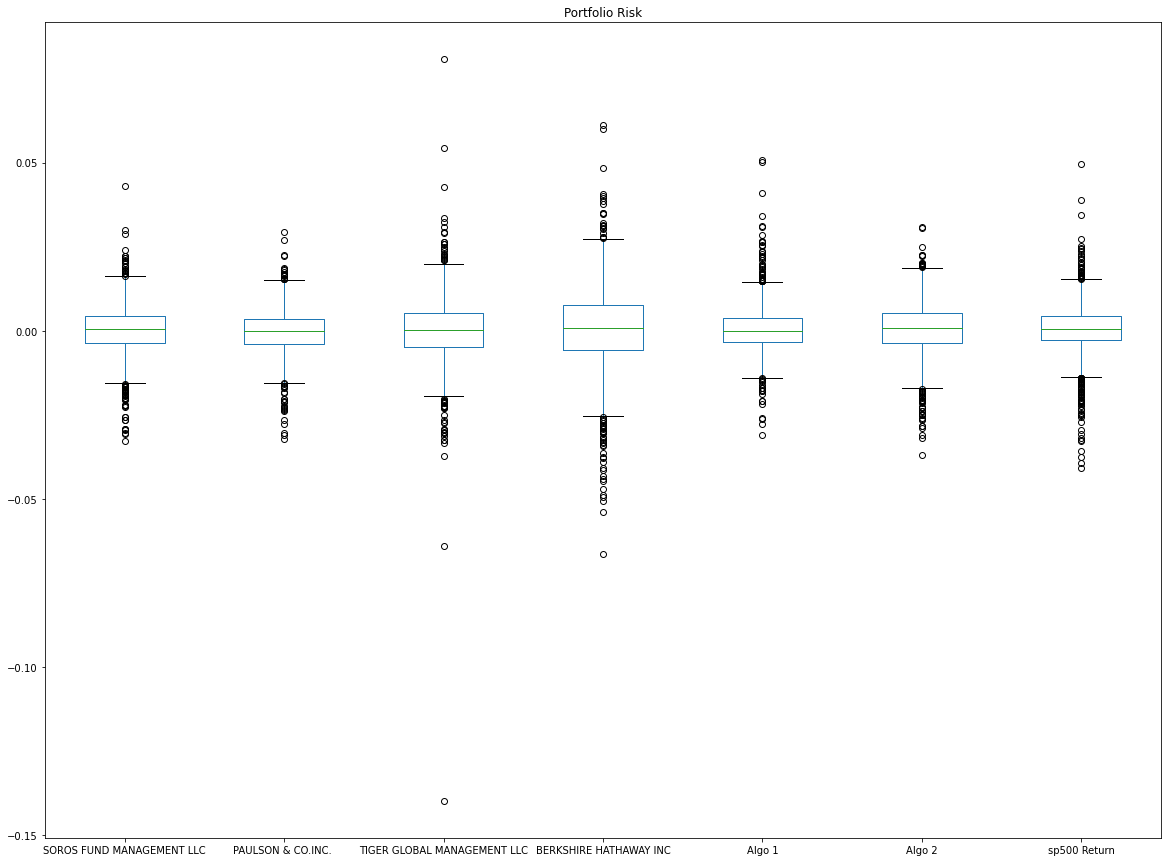

In [21]:
# Box plot to visually show risk
joined_return.plot(kind="box", figsize = (20,15), title="Portfolio Risk")

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
daily_std_data = joined_return.std()

In [23]:
daily_std_data

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500 Return                   0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_return.std()
sp500_daily_std.head()

sp500 Return    0.008111
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_data = daily_std_data*np.sqrt(252)
annualized_std_data

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500 Return                   0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

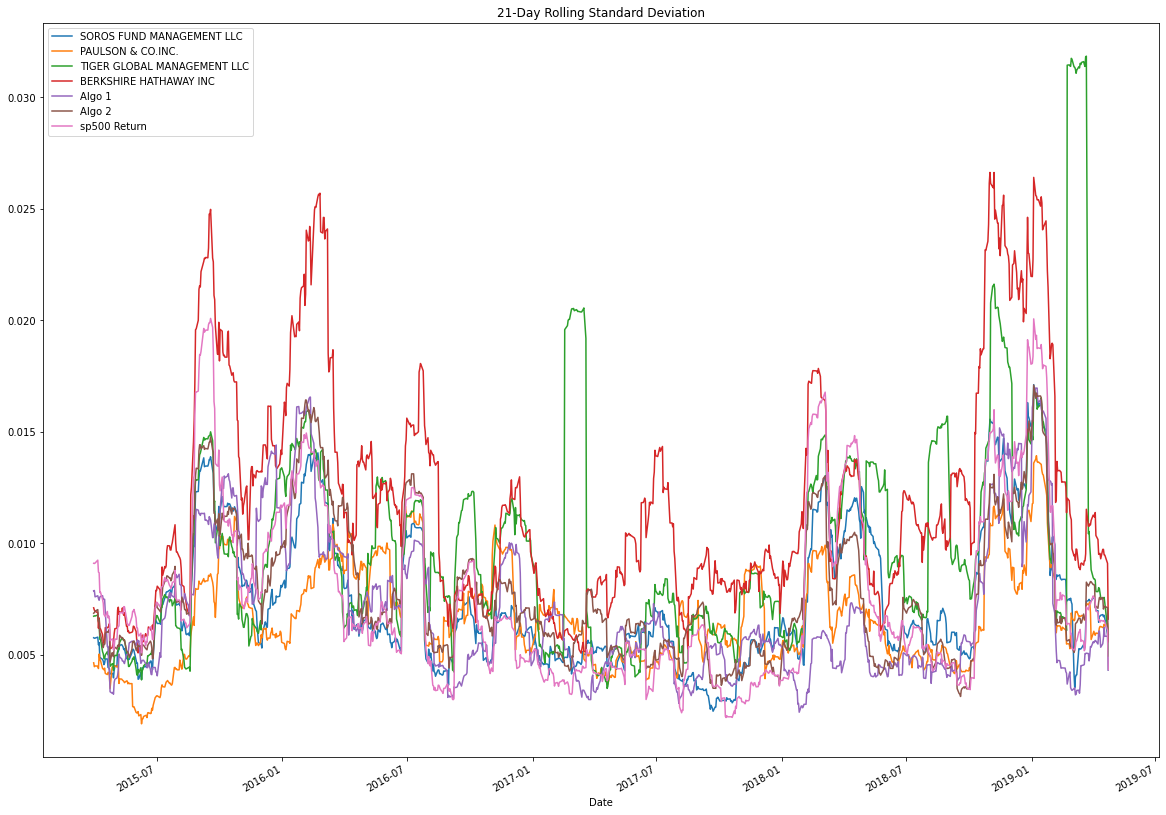

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_data = joined_return.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_data.plot(figsize=(20,15), title="21-Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation_data = joined_return.corr()
# Display de correlation matrix
correlation_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500 Return,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [29]:
# Calculate covariance of a single portfolio
covariance = joined_return['Algo 1'].cov(joined_return['sp500 Return'])
covariance




1.821774999163274e-05

In [30]:
# Calculate variance of S&P 500
variance = joined_return['sp500 Return'].var()
variance

7.316632424648712e-05

In [31]:
# Computing beta
beta = covariance / variance
beta

0.24899091459425635

In [32]:
# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [33]:
# Use `ewm` to calculate the rolling window
rolling_ewm = joined_return.ewm(span=21, adjust=False).mean()

<AxesSubplot:title={'center':'21-Day Exponentially Weighted Moving Averages'}, xlabel='Date'>

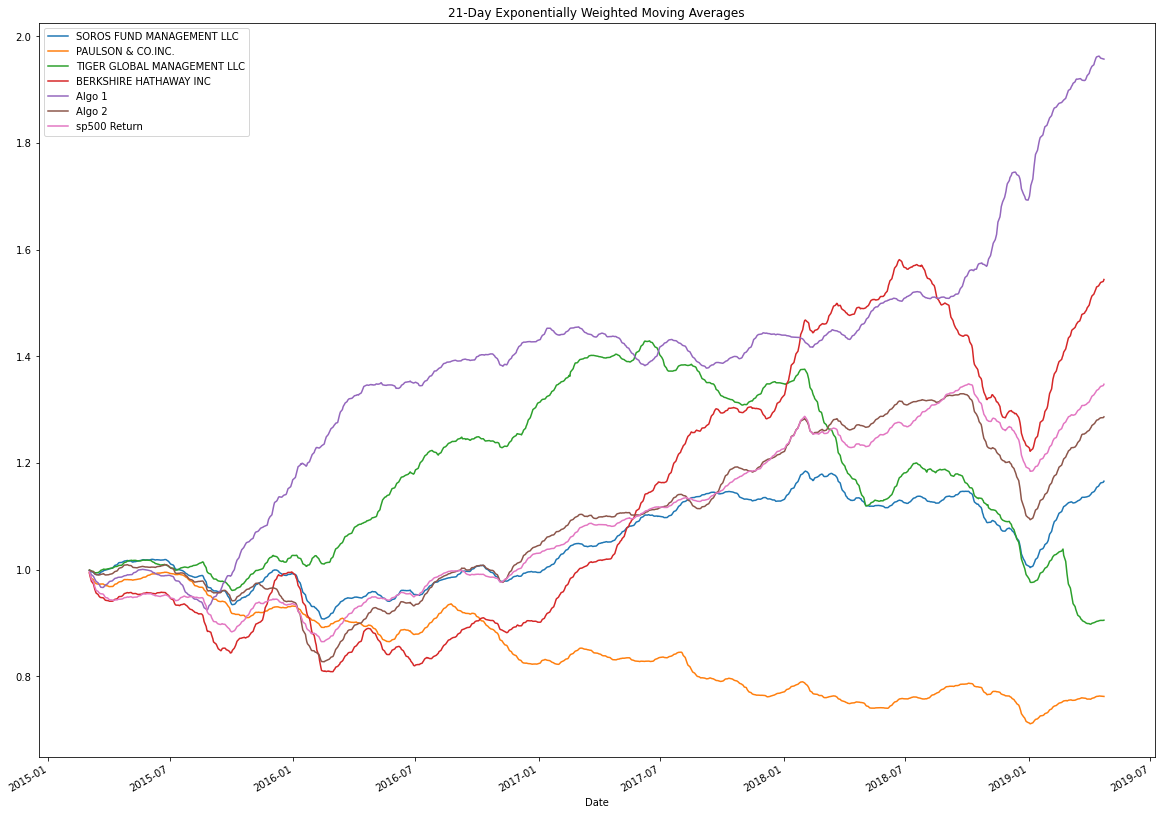

In [34]:
(1 + rolling_ewm).cumprod().plot(figsize = (20,15), title="21-Day Exponentially Weighted Moving Averages")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
annualized_sharp_ratios = joined_return.mean()*252 / (joined_return.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Annualized Sharp Ratios'}>

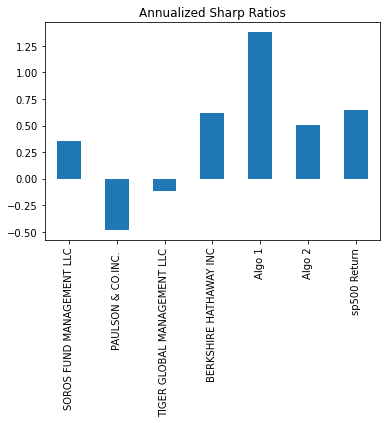

In [36]:
# Visualize the sharpe ratios as a bar plot
annualized_sharp_ratios.plot(kind="bar", title="Annualized Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both Algo 1 and Algo 2 outperformed Soros Fund Management, Paulson & Co. and Tiger Global Management. Algo 1 outperfomed both the market as awhole, and the Investment Management Firm portfolio. Algo 2, underperfomed the market as a whole and Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [37]:
# Reading data from 1st stock
goog_data = pd.read_csv('./Resources/goog_historical.csv', index_col = "Trade DATE",  infer_datetime_format=True, parse_dates=True)

In [38]:
# Reading data from 2nd stock
aapl_data = pd.read_csv('./Resources/aapl_historical.csv', index_col = "Trade DATE",  infer_datetime_format=True, parse_dates=True)

In [39]:
# Reading data from 3rd stock
cost_data = pd.read_csv('./Resources/cost_historical.csv', index_col = "Trade DATE",  infer_datetime_format=True, parse_dates=True)

In [40]:
# Combine all stocks in a single DataFrame
combined_hist_data = pd.concat([goog_data, aapl_data, cost_data], axis='columns', join='inner')
combined_hist_data

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48


In [41]:
# Reset Date index
combined_hist_data = combined_hist_data.drop(columns=['Symbol'])
combined_hist_data

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [42]:
# Reorganize portfolio data by having a column per symbol
column=['GOOG', 'AAPL', 'COST']

In [43]:
combined_hist_data.columns = column
combined_hist_data.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [44]:
# Calculate daily returns
combined_hist_return = combined_hist_data.pct_change()
# Drop NAs
combined_hist_return.dropna(inplace=True)
# Display sample data
combined_hist_return.sort_index(inplace=True)
combined_hist_return.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,-0.001763,0.002339,-0.000613
2018-05-14,0.019431,0.009172,0.002046
2018-05-15,-0.002348,-0.009246,-0.016255
2018-05-16,0.002948,0.006364,-0.004459
2018-05-17,0.011469,0.003650,0.003217


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_return = combined_hist_data.pct_change().dot(weights)
# Display sample data
combined_return.dropna(inplace=True)
combined_return.sort_index(inplace=True)
combined_return.head()

Trade DATE
2018-05-11   -0.000012
2018-05-14    0.010216
2018-05-15   -0.009283
2018-05-16    0.001618
2018-05-17    0.006112
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
total_return = pd.concat([combined_return, joined_return], axis='columns', join='inner')
total_return.rename(columns = {0 :"GOOG/AAPL/COST"}, inplace= True)
total_return.head()

,GOOG/AAPL/COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return
2018-05-11,-0.000012,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_return.dropna(inplace=True)
total_return.head()

,GOOG/AAPL/COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return
2018-05-11,-0.000012,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
annualized_total_std = total_return.std()*np.sqrt(252)
annualized_total_std

GOOG/AAPL/COST                 0.212687
SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
sp500 Return                   0.151739
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviations'}>

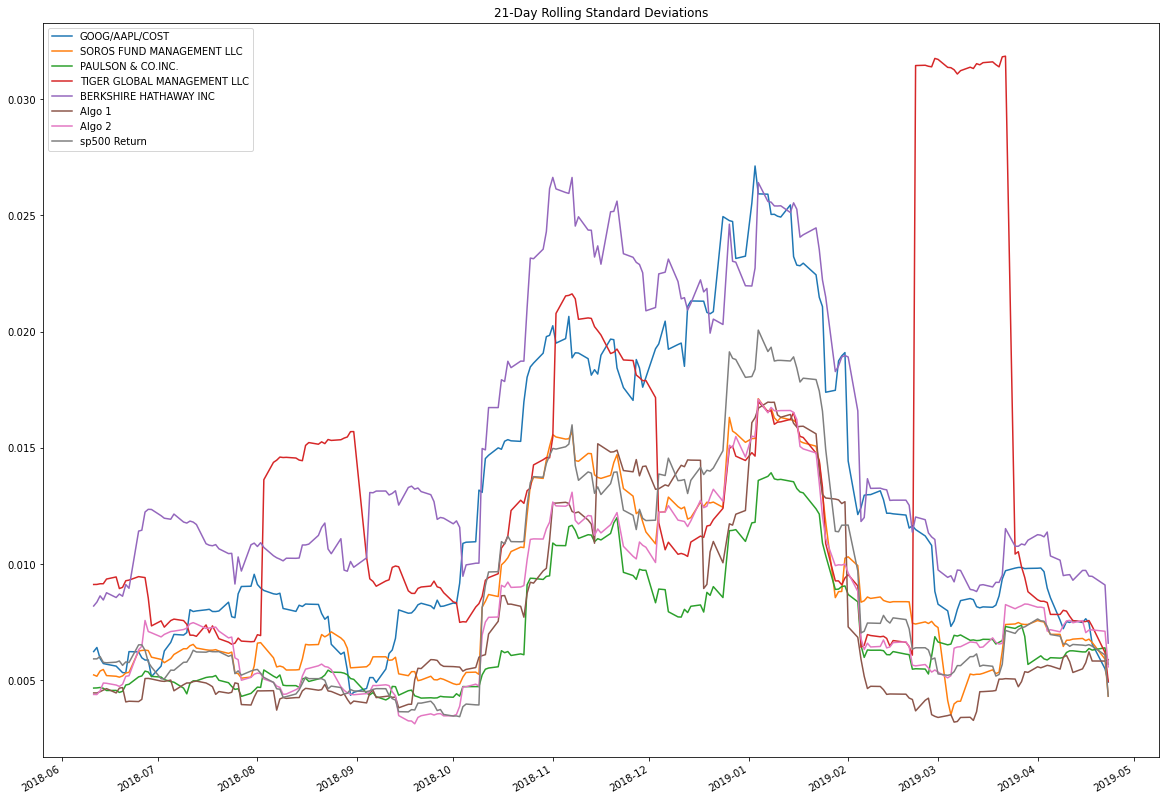

In [49]:
# Calculate rolling standard deviation
all_portfolio_rolling = total_return.rolling(window=21).std()
# Plot rolling standard deviation
all_portfolio_rolling.plot(figsize=(20,15), title="21-Day Rolling Standard Deviations")

### Calculate and plot the correlation

In [50]:
# Calculate and plot the correlation
correlation = total_return.corr()
correlation

,GOOG/AAPL/COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Return
GOOG/AAPL/COST,1.000000,0.061454,0.025683,0.036044,0.006772,0.073278,0.039845,0.070790
SOROS FUND MANAGEMENT LLC,0.061454,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089
PAULSON & CO.INC.,0.025683,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696
TIGER GLOBAL MANAGEMENT LLC,0.036044,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095
BERKSHIRE HATHAWAY INC,0.006772,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968
Algo 1,0.073278,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290
Algo 2,0.039845,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699
sp500 Return,0.070790,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'rolling 60-Day Beta of GOOG/AAPL/COST'}>

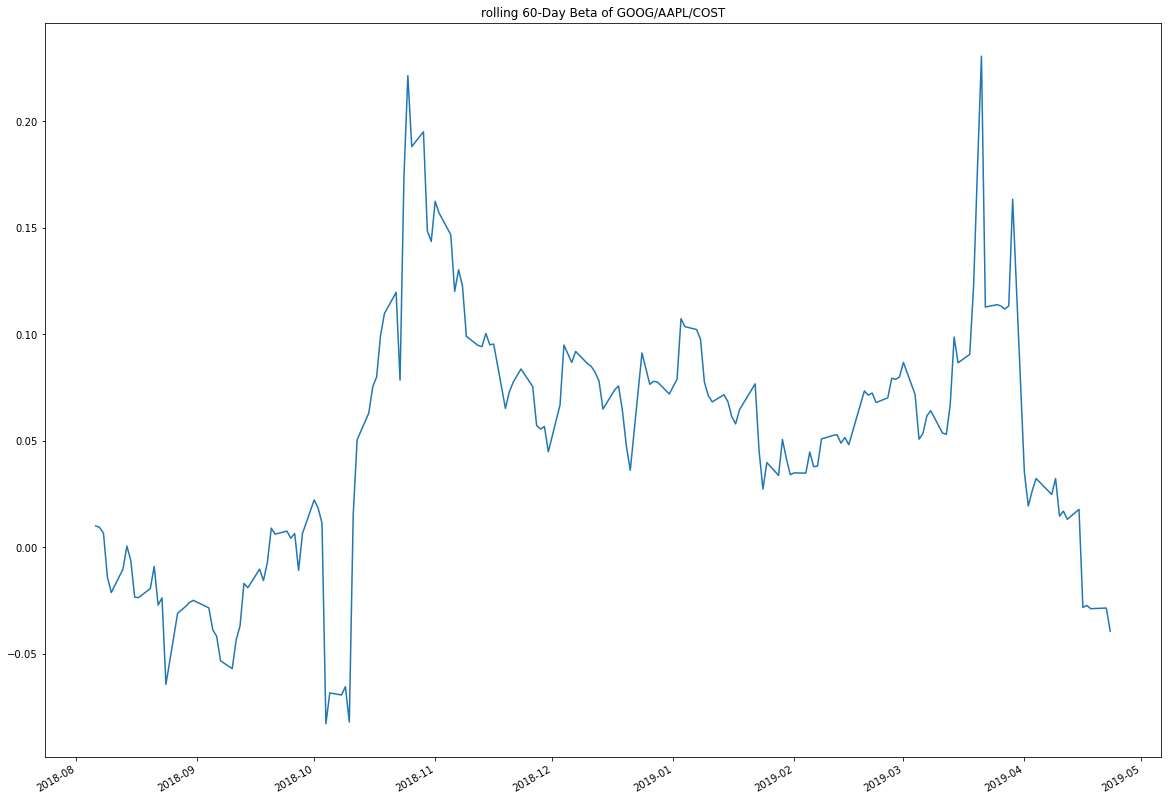

In [51]:
# Calculate and plot Beta
rolling_cov = total_return['GOOG/AAPL/COST'].rolling(window=60).cov(total_return['sp500 Return'])
rolling_var = total_return['GOOG/AAPL/COST'].rolling(window=60).var()
rolling_beta= rolling_cov/rolling_var
rolling_beta.plot(figsize=(20,15), title="rolling 60-Day Beta of GOOG/AAPL/COST")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = total_return.mean()/total_return.std()*252**.5
sharpe_ratio

GOOG/AAPL/COST                -0.614330
SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
sp500 Return                   0.595486
dtype: float64

<AxesSubplot:>

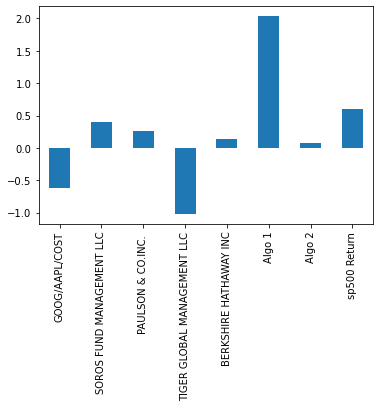

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")

### How does your portfolio do?

Write your answer here!